In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import scipy
from sklearn import linear_model
import statsmodels.api as sm

sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 5})

In [3]:
T = 2000; maxLags = 100; a1 = 0.83;

#create the data
x = np.random.normal(0,1,(T)) #stimulus
y = np.random.normal(0,1,(T)) #signal
for t in range(3, len(y)-1):
    y[t+1] += a1 * y[t] + x[t-3]  # AR(1)

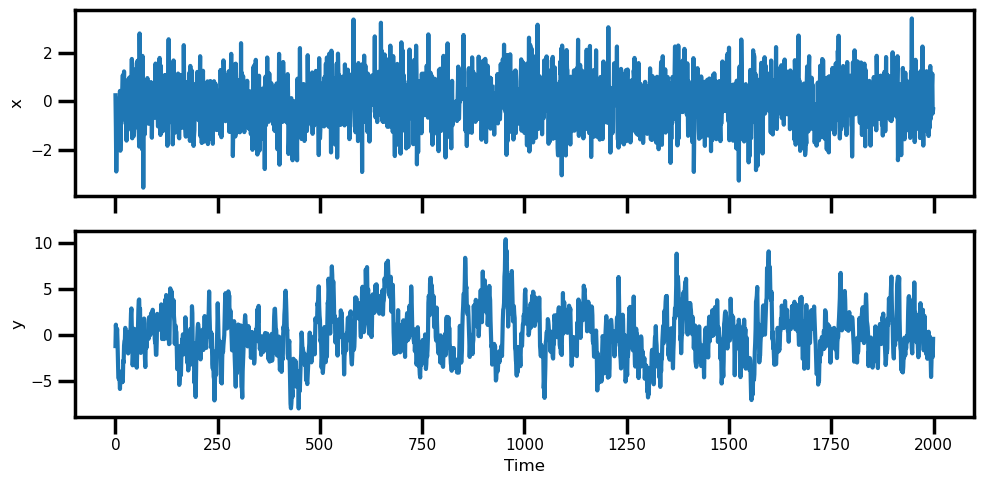

In [7]:
#plot stimulus and signal
fig, ax = plt.subplots(figsize=(10,5), nrows=2, ncols=1, sharex=True)

ax[0].plot(x)
ax[0].set_ylabel('x')
ax[1].set_xlabel('Time')

ax[1].plot(y)
ax[1].set_ylabel('y')
plt.tight_layout()

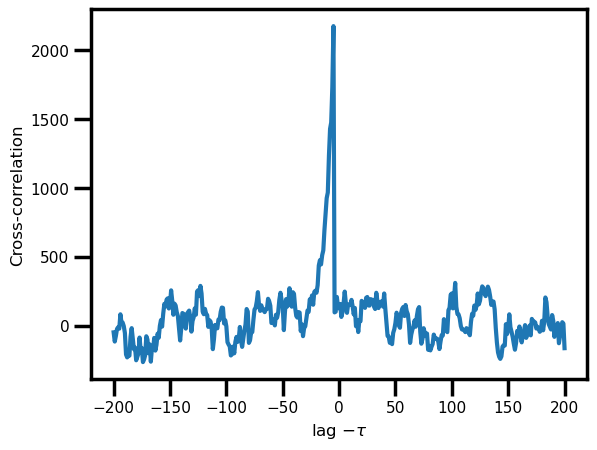

In [8]:
maxLags = 200 #choose the maximal lag

# cross-correlation:
xc = scipy.signal.correlate(x, y, "full")

plt.plot(np.arange(-maxLags, maxLags+1), xc[len(x)-maxLags:len(x)+maxLags+1])

plt.xlabel(r"lag $-\tau$");
plt.ylabel(r"Cross-correlation");

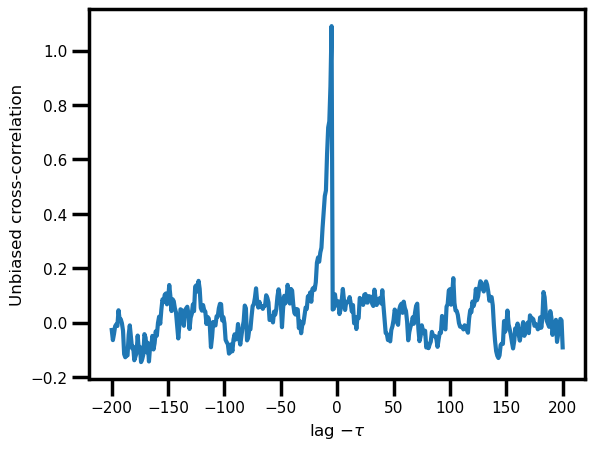

In [13]:
######Exercise 1
#Implement unbiased cross-correlation, Equation 12 
norm = ...

plt.plot(np.arange(-maxLags, maxLags+1), xc[len(x)-maxLags:len(x)+maxLags+1]/norm)

plt.xlabel(r"lag $-\tau$");
plt.ylabel(r"Unbiased cross-correlation");

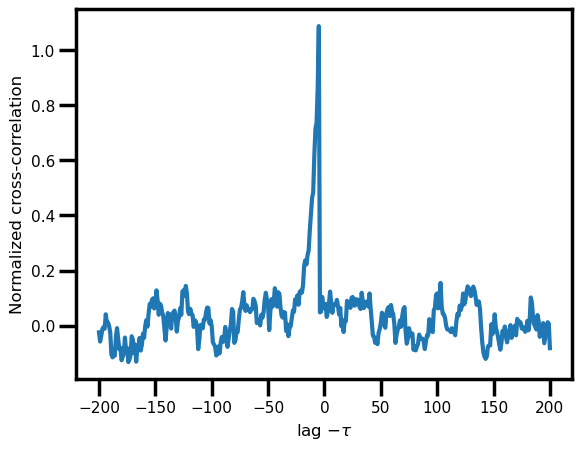

In [18]:
######Exercise 2
#Implement normalization to the correlation coefficients, see Equation 13
norm_corrcoeff = ...

plt.plot(np.arange(-maxLags, maxLags+1), xc[len(x)-maxLags:len(x)+maxLags+1]/norm_corrcoeff)

plt.xlabel(r"lag $-\tau$");
plt.ylabel(r"Normalized cross-correlation");

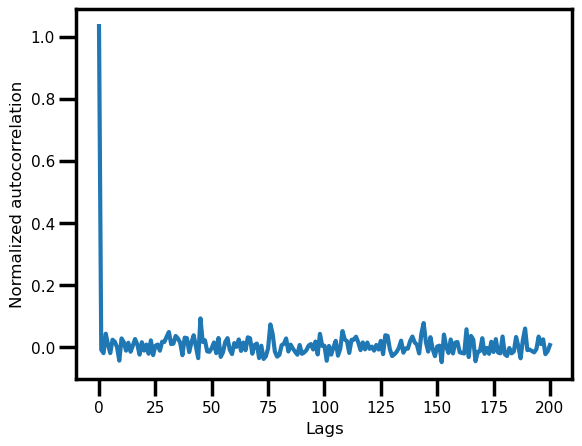

In [27]:
######Exercise 3

#autocorrelation
ac_x = scipy.signal.correlate(x, x, mode='full')

#Implement unviased normalization for the autocorrelation, see Equation 13
T = x.shape[0]
acnorm = ...


plt.plot(np.arange(maxLags+1), ac_x[len(x)-1:len(x)+maxLags] /acnorm, label='x')
plt.xlabel('Lags')
plt.ylabel('Normalized autocorrelation');

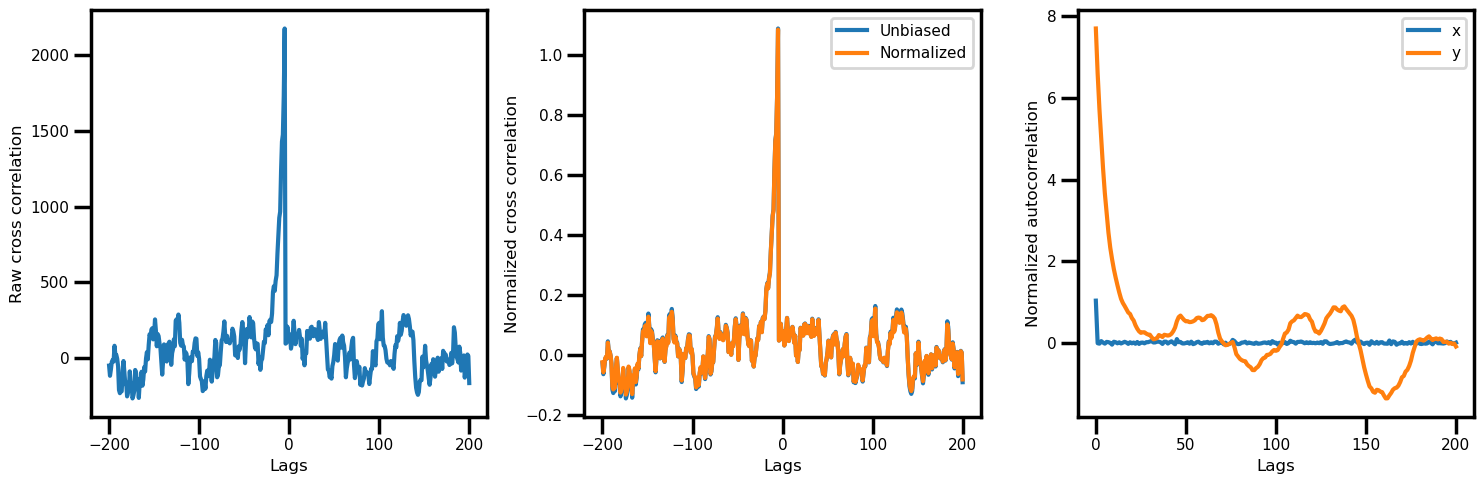

In [26]:
#Everything combined
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)

xc =scipy.signal.correlate(x, y, "full")[len(x)-maxLags:len(x)+maxLags+1]; 

ax[0].plot(np.arange(-maxLags, maxLags+1), xc)
ax[0].set_ylabel('Raw cross correlation')
ax[0].set_xlabel('Lags')

ax[1].plot(np.arange(-maxLags, maxLags+1), xc/norm, label='Unbiased')
ax[1].plot(np.arange(-maxLags, maxLags+1), xc/norm_corrcoeff, label='Normalized')
ax[1].set_ylabel('Normalized cross correlation')
ax[1].set_xlabel('Lags')
ax[1].legend()

ac_x = scipy.signal.correlate(x, x, mode='full')[len(x)-1:len(x)+maxLags] 
ac_y = scipy.signal.correlate(y, y, mode='full')[len(x)-1:len(x)+maxLags] 
ax[2].plot(np.arange(maxLags+1), ac_x /acnorm, label='x')
ax[2].plot(np.arange(maxLags+1), ac_y/acnorm, label='y')

ax[2].set_xlabel('Lags')
ax[2].set_ylabel('Normalized autocorrelation')
ax[2].legend()
plt.tight_layout()